In [12]:
from pathlib import Path
models = list(Path(".").glob("model_*/"))
# train_logs = {
#     directory.name : list(
#         sorted(
#             list(
#                 directory.glob("checkpoint-*")),key=lambda p: int(p.name.split("-")[-1])
#                                  )[-1].glob("trainer_state.json"))[0] for directory in models
# }
train_logs = dict()
for directory in models:
    try:
        final_checkpoint = sorted(
                list(
                    directory.glob("checkpoint-*")),key=lambda p: int(p.name.split("-")[-1])
                                    )[-1]
    except IndexError:
        continue
    trainer_state = final_checkpoint/ "trainer_state.json"
    if trainer_state.exists():
        train_logs[directory.name] = trainer_state
import pandas as pd
import json
data = []
for k, p in train_logs.items():
    _, task, LR, epoch, gas = k.split("_")
    d = json.loads(Path(p).read_text())["log_history"]
    for i in d:
        data.append({
            "LR": LR,
            "max_epoch": epoch,
            "model": k,
            "task": task,
            "gas": gas,
            **i
        })


In [13]:
df = pd.DataFrame(data)
df["gas"] = df.gas.astype(int)
df["LR"] = df.LR.astype(float)

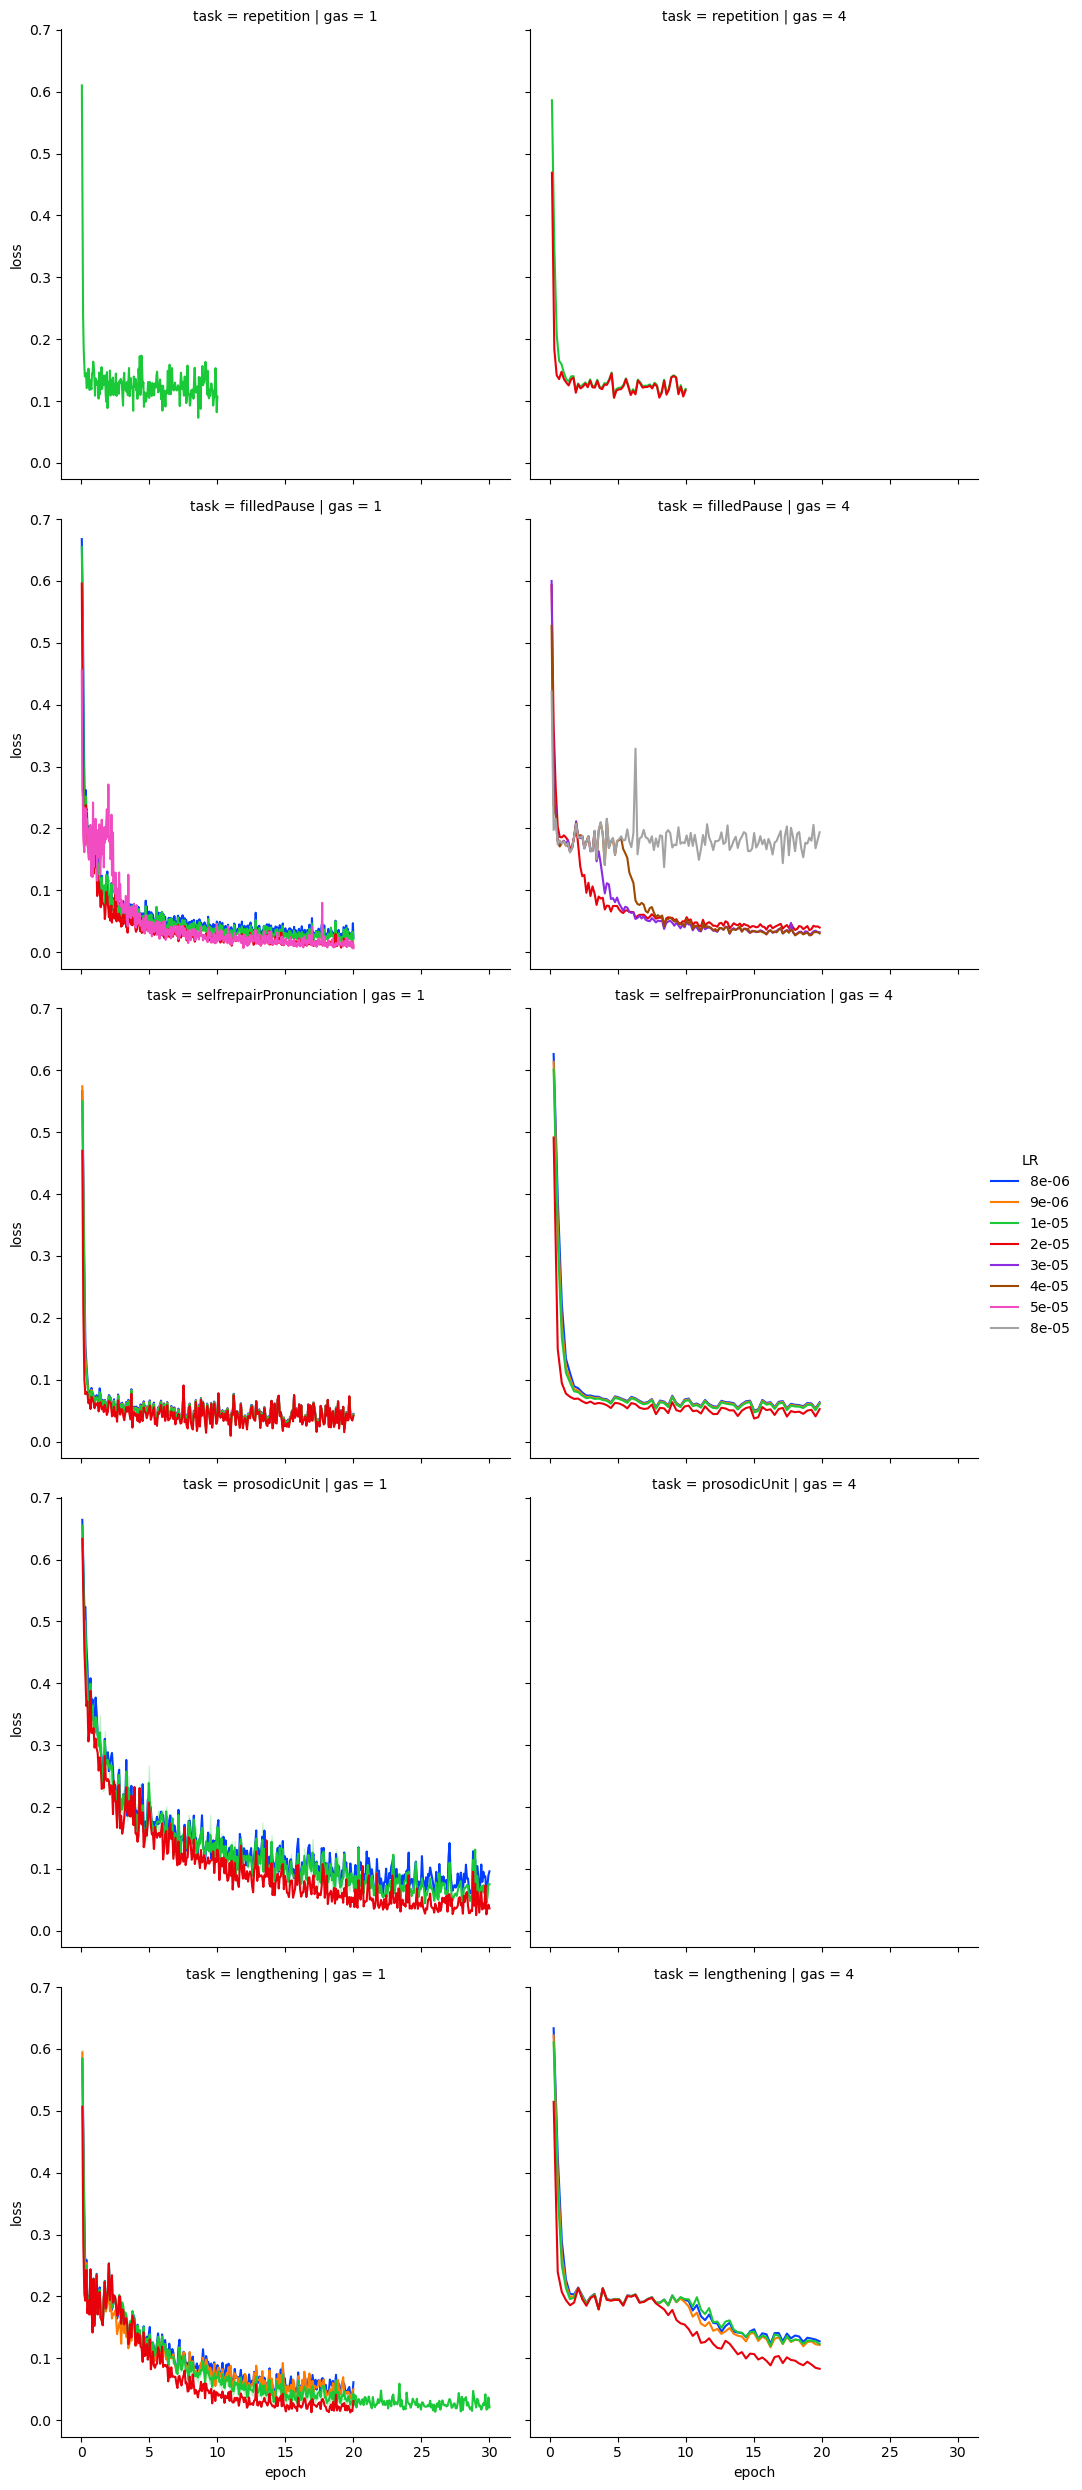

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

g = sns.relplot(
    data=df,
    x="epoch",
    y="loss",
    hue="LR",
    row="task",
    col="gas",
    kind="line",
    palette="bright",
)


# for label in g.legend.texts:
#     label.set_text(
#         f"{float(label.get_text()):e}")